In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import scipy.integrate as integ
import sympy as sp
from labellines import labelLine, labelLines


Function to model Mercedes Crash Test Data
$$ a = \frac{22000}{((t-74)^2+500)} $$
![Mercedes Crash Data](./WITH.gif)

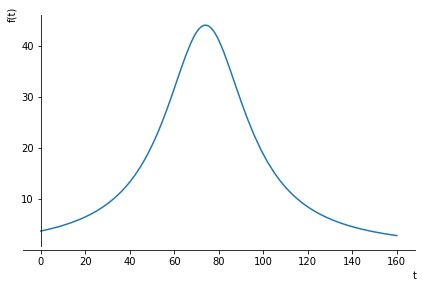

In [2]:
t,d=sp.symbols('t,d')
a = 22e3/((t-74)**2+500) ## bell curve approximation
std = 25
mean = 74
# a = 1/(std*sp.sqrt(2*sp.pi))*sp.exp(-1/2*((t-mean)/std)**2)*2500
sp.plot(a,(t,0,160),axis_center=(0,0))


In [3]:

at2 = sp.integrate(a,(t,t,t+d))
H = d*((1/d)*at2)**2.5/1000
H

d*((-983.869910099907*atan(0.0447213595499958*t - 3.30938060669969) + 983.869910099907*atan(0.0447213595499958*d + 0.0447213595499958*t - 3.30938060669969))/d)**2.5/1000

In [4]:
H = sp.lambdify([t,d],H,"numpy")


[None, None, None, None, None, None, None, None, None, None, None]

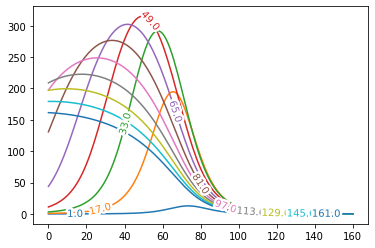

In [10]:
xt= np.linspace(0,160,161)
xd=np.linspace(1,161,11)
H_curves =[]
for d in xd:
    curve = [H(xt,d),d]
    H_curves.append(curve)
    plt.plot(xt,curve[0],label=d)
labelLines(plt.gca().get_lines(), zorder=2.5)


In [6]:
H_curves=np.asmatrix(H_curves)
HIC = np.asmatrix([(np.amax(curve[0,0]),curve[0,1]) for curve in H_curves],dtype=object)
HIC

/Users/ericreyes/.local/share/virtualenvs/ee104-gdVpYSdT/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = N.array(data, dtype=dtype, copy=copy)


matrix([[12.820604225076316, 1.0],
        [194.6982196278373, 17.0],
        [291.768145188342, 33.0],
        [315.1410418828146, 49.0],
        [302.2230828262905, 65.0],
        [276.61182893369505, 81.0],
        [248.7964297548634, 97.0],
        [222.71162169869442, 113.0],
        [199.53481121700602, 129.0],
        [179.37361025509935, 145.0],
        [161.47520688129973, 161.0]], dtype=object)

In [7]:
maxHIC=np.amax(HIC)
maxD = HIC[np.where(HIC == maxHIC)[0],1]
print(f"MaxHIC of {maxHIC} at d={maxD[0,0]}")

MaxHIC of 315.1410418828146 at d=49.0
